In [1]:
import tensorflow as tf # pip install tensorflow
import numpy as np # pip install numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Load data set from MNIST 

This dataset contains: 60,000 training samples; and 10,000 test samples

In [2]:
mnist = tf.keras.datasets.mnist # MNIST dataset comprises handwritten characters based on 28x28 sized images of 0-9

# Once the MNIST dataset is loaded, the dataset will be diveded into 'train' and 'test' datasets.

In [3]:
# expanding the dataset into train and test groups
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

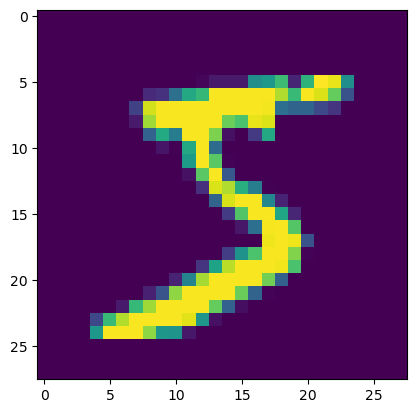

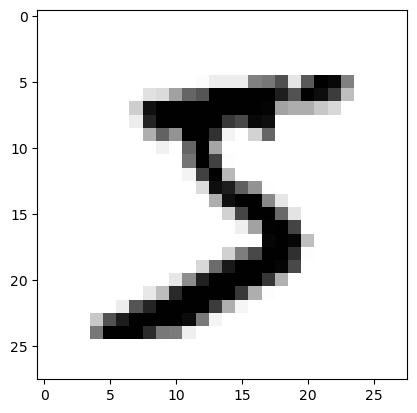

In [6]:
import matplotlib.pyplot as plt #pip install matplotlib

#view first image of training example
plt.imshow(x_train[0])
plt.show() #execute graph 

#As we do not know if the image is in full color of binary format, the below code changes the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)

# The images in the dataset are currently mapped to a Grey Scale [(1 channel ==> 0 to 255), and the images are not colored (RBG)]. 

Therefore, given the fast range of values in the feautres (0 to 255), we being the data pre-processing step by normalising the data. 

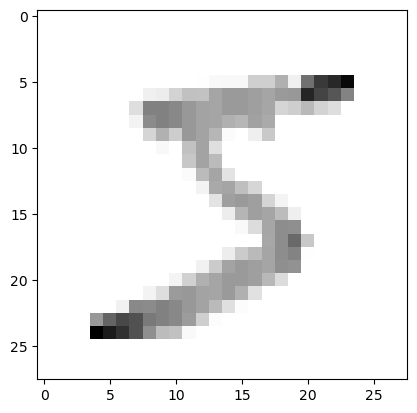

In [7]:
### Normalise the dataset 
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

# After Normalization has been successfully run, the value of the x(n) features will range from 0 to 1 (where previously it ranged from 0 to 255).

In [8]:
### Test normalization of data by printing first training example
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
### Confirm y_label of example x[0]
print(y_train[0])

5


## Resizing Image to ensure compatability with Convolution Layer of Model

In [10]:
import numpy as np #pip install numpy
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing by 1 dimensio0n for kernerl=filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increasing by 1 dimensio0n for kernerl=filter operation
print("Training Samples dimension",x_trainr.shape)
print ("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Model - Neural Network
### This model will be trained using the above 60,000 samples of handwritten digits from the MNIST dataset

In [13]:
### Import model and layers from Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
### Neural Network Model Framework
model = Sequential()

### 1st Convolution Layer 
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu")) ## activation funciton = relu, which means than any values <0 will be removed from the process
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maximum values of 2x2 only, will be propogated to the next laer

### 2nd Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### 3rd Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### 1st Fully Connected Layer 
model.add (Flatten()) ### serves to flaten the arrays from 2D to 1D
model.add (Dense(64))
model.add (Activation("relu"))

### 2nd Fully Connected Layer
model.add (Dense(32)) ### reducing the output value size
model.add (Activation("relu"))

### Final Output Layer
model.add (Dense(10)) ## Output layer = 10 as 10 is the maximum number of possible prediction from intial input (i.e. 0-9)
model.add (Activation("softmax")) ### Softmax activation function chosen for Multiclass Classifcation

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

## Now that our Model is developed, we will need to compile - by defining the loss function; the learning optimizer; and performance metrics 

In [17]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

## Now that we have compiled our Model, we will begin training. The model will be trained on resized training set (x_trainr) along with the corresponding Y values (y_train).

### The training will commence over 10 Epochs. An Epoch is a training interval, which means that it represents an instance of the complete training data set being passed through the model. As our Epoch will be set to 10, this means that our training data set (consisting of 60,000 samples), will be passed through the model 10 times. 

### The loss function that we will use is Sparse Categorical Crossentrophy. This loss function is commonly used for multiclass classification tasks (where the need to measure the difference between two probability distributions for a dataset is important)

### The optimizer which will be used is the adam optimiser, which is a powerful learning algorithim to reduce the loss function. 

In [18]:
model.fit(x_trainr, y_train, epochs=10, validation_split = 0.3) ### The validation_split argument will reserve 30% of the x_trainr dataset for validation. Accuracy of the model will therefore be compared between the training dataset(x_trainr) and the validation training set (validation_split)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7625 - loss: 0.7223 - val_accuracy: 0.9567 - val_loss: 0.1394
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9650 - loss: 0.1127 - val_accuracy: 0.9735 - val_loss: 0.0838
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9770 - loss: 0.0769 - val_accuracy: 0.9658 - val_loss: 0.1105
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9798 - loss: 0.0621 - val_accuracy: 0.9813 - val_loss: 0.0655
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9854 - loss: 0.0461 - val_accuracy: 0.9792 - val_loss: 0.0692
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9870 - loss: 0.0396 - val_accuracy: 0.9764 - val_loss: 0.0816
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9901 - loss: 0.0332 - val_accuracy: 0.9812 - val_loss: 0.0695
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9914 - loss: 0.0

In [19]:
### Evaluating accuracy and loss on training data set 

test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test Loss on 10,000 test samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0800
Test Loss on 10,000 test samples 0.0617314837872982
Validation Accuracy on 10,000 test samples 0.9825000166893005


### In the above training epochs, you will find that the accuracy of the training set is very close to the accuracy of the validation set (val_accuracy)

### If the training data set demonstrated a high accuracy (e.g. 0.99) but the validation accuracy demonstrated a low accuracy (e.g. 0.5), then our model would be overfitting

### If the training data set demonstrated a low accuracy (e.g. 0.5), then the model would be underfitting

### In the case of our model, the accuracy of the training and validation are both similiar and high, hence there is no suggestion that our model is under or overfitting

In [20]:
### Test model for accurate predictions against test data set

predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
print (predictions)

[[2.78241174e-07 1.80787276e-06 1.13126835e-05 ... 9.99979436e-01
  9.43794532e-07 2.75707407e-06]
 [6.50736138e-06 1.76209462e-04 9.99805331e-01 ... 5.22847722e-06
  9.37256530e-08 2.59498307e-07]
 [6.67856991e-13 1.00000000e+00 2.24553937e-13 ... 3.53263664e-12
  2.68828297e-12 1.59852139e-13]
 ...
 [2.30850161e-09 8.01932340e-11 8.40753682e-13 ... 5.28174116e-10
  3.01073277e-09 9.56042800e-09]
 [5.23537267e-07 1.09129250e-09 8.53444659e-12 ... 3.04763237e-09
  8.07330522e-08 1.72073953e-06]
 [1.32071295e-06 1.01015166e-06 2.13651475e-07 ... 6.58505639e-10
  9.37738491e-07 5.30774059e-07]]


## The values above are predictions based on arrays generated via one hot encoding of the 10 class probabilities generated by the softmax activation (i.e. probabilities of xth feature being 0-9). 

## Below we will use the argmax function of numpy to return the maximum value probability for the xth training example

In [22]:
### Model prediction of the first training example 

print(np.argmax(predictions[0]))

7


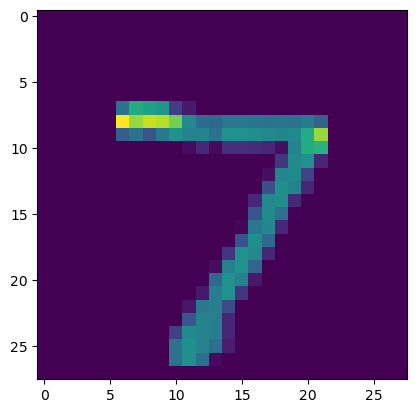

In [23]:
### Verify if the model's prediction was correct by showing the value of training example [0]
plt.imshow(x_test[0])

In [24]:
### Model prediction of the 300th training example
print (np.argmax(predictions[300]))

4


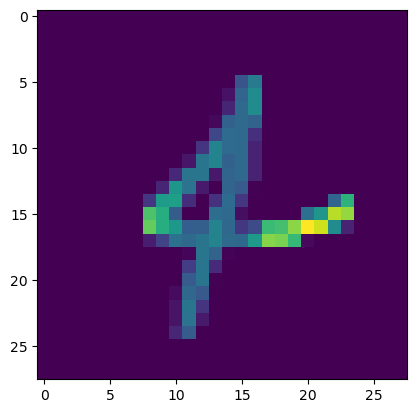

In [25]:
### Verify if the model's prediction was correct by showing the value of training example [300]
plt.imshow(x_test[300])

## Now that we have validated the model's performance on the test data set, we can now test the model's accuracy using manually generated image from external sources. 

In [27]:
import cv2 ### pip install opencv-python

In [58]:
imgtest = cv2.imread("six.png") ### import external test image

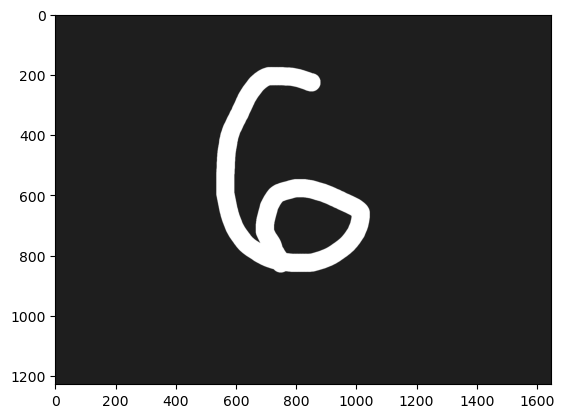

In [59]:
plt.imshow(imgtest)

In [60]:
imgtest.shape

(1228, 1648, 3)

## As we can, the image imported is a 3D array  which is in BGR scale. Before testing the imported image with our model, the image will need be resized and rescaled into gray. 

In [61]:
gray = cv2.cvtColor(imgtest, cv2.COLOR_BGR2GRAY) ### Convert external image from BGR scale to gray scale
gray.shape ### verify 2D array of image

(1228, 1648)

## Now that the image is rescaled to a 2D array, we will need to resize the image to fit the parameters on which the model was trained, i.e. 28x28

In [62]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA) ### resize image to 28x28 
resized.shape ### confirm new shape 

(28, 28)

## Lastly, we will now normalise the image using 0-1 scaling and reshape the image to accomodate for the kernel operation of the convolution layer

In [63]:
newimg = tf.keras.utils.normalize (resized, axis = 1) ### 0-1 scaling
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1) ### kernel operation of convolution layer
newimg.shape ### verify shape of rescaled image

(1, 28, 28, 1)

In [64]:
predictions = model.predict(newimg) ### predict image with model
print (np.argmax(predictions)) ### print prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6


In [57]:
model.save("model_complete.keras")